## **Section 6: Vanguards-lite-with-Token-Bucket Countermeasure**

- Using this notebook, figure 8 in our paper can be obtained.

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from os.path import join, abspath
from matplotlib.lines import Line2D

In [2]:
DATA_DIR = abspath("./3_data_vanguards-lite-with-token-bucket")

In [3]:
def load_from_json(json_path):
    return json.loads(open(json_path).read())


def load_sim_results(json_path, attack_times):

    # Load simulation result JSON.
    res = load_from_json(json_path)

    # Pretty-format the adversary-controlled share of HSDirs.
    h = "-1"
    if res["n_adv_hsdirs"] == 1:
        h = "1/6"
    elif res["n_adv_hsdirs"] == 2:
        h = "1/3"
    elif res["n_adv_hsdirs"] == 6:
        h = "1"

    # Pretty-format the adversarial relay bandwidth share.
    b = "%d%%" % (100 * float(res["adv_bw_share"]))

    # Extract the initialization value for the token bucket.
    tb_iv = res["n_initial_tokens"]

    # Extract the refill rate for the token bucket.
    tb_refill = res["token_refill_rate"]

    # Extract whether Vanguards-lite was enabled.
    vanguardslite_enabled = False
    if "vanguardslite_enabled" in res:
        vanguardslite_enabled = res["vanguardslite_enabled"]

    simulation_duration = res["simulation_duration"]

    # Append each attack duration with attached metadata to list of all results.
    for timestamp in res["attack_durations"]:
        attack_times.append(
            (h, b, tb_iv, tb_refill, vanguardslite_enabled, timestamp))

In [4]:
attack_times = []

for json_path in glob(join(DATA_DIR, "time_to_double_comp_*.json")):
    load_sim_results(json_path, attack_times)

In [5]:
df = pd.DataFrame(
    attack_times, columns=["h", "b", "tb_iv", "tb_refill", "vanguardslite_enabled", "attack_duration"])
df.head(15)

,h,b,tb_iv,tb_refill,vanguardslite_enabled,attack_duration
0,1/6,5%,10,0.0,True,300.0000
1,1/6,5%,10,0.0,True,300.0000
2,1/6,5%,10,0.0,True,300.0000
3,1/6,5%,10,0.0,True,300.0000
4,1/6,5%,10,0.0,True,300.0000
5,1/6,5%,10,0.0,True,300.0000
6,1/6,5%,10,0.0,True,300.0000
7,1/6,5%,10,0.0,True,300.0000
8,1/6,5%,10,0.0,True,300.0000
9,1/6,5%,10,0.0,True,300.0000


In [6]:
assert df["vanguardslite_enabled"].any() == True
assert df["vanguardslite_enabled"].all() == True
assert df["tb_iv"].astype(bool).any() == True
assert df["tb_iv"].astype(bool).all() == True
assert df["tb_refill"].astype(bool).any() == False
assert df["tb_refill"].astype(bool).all() == False

In [7]:
pd.options.display.float_format = "{:,.2f}".format

df.groupby(["b", "h", "tb_iv", "tb_refill"]).attack_duration.describe(percentiles=[0.25, 0.50, 0.90, 0.95, 0.99])

count   mean    std  min    25%    50%    90%  \
b  h   tb_iv tb_refill                                                      
5% 1   5     0.00      143,350.00 180.87 145.63 0.19   2.67 300.00 300.00   
       10    0.00      143,350.00  70.27 124.07 0.19   2.35   3.25 300.00   
   1/3 5     0.00      143,350.00 279.55  75.21 0.19 300.00 300.00 300.00   
       10    0.00      143,350.00 233.19 123.87 0.28 300.00 300.00 300.00   
       15    0.00      143,350.00 185.22 144.23 0.24   4.02 300.00 300.00   
   1/6 5     0.00      143,350.00 294.06  41.57 0.38 300.00 300.00 300.00   
       10    0.00      143,350.00 278.26  77.29 0.19 300.00 300.00 300.00   
       15    0.00      143,350.00 256.77 104.51 0.19 300.00 300.00 300.00   

                          95%    99%    max  
b  h   tb_iv tb_refill                       
5% 1   5     0.00      300.00 300.00 300.00  
       10    0.00      300.00 300.00 300.00  
   1/3 5     0.00      300.00 300.00 300.00  
       10    0.00      300.00 300.00 300.00  
       15    0.00      300.00 300.00 300.00  
   1/6 5     0.00      300.00 300.00 300.00  
       10    0.00      300.00 300.00 300.00  
       15    0.00      300.00 300.00 300.00

In [8]:
pd.options.display.float_format = "{:,.2f}".format

df_h_one_two = df[(df["h"] == "1/3") | (df["h"] == "1/6")]
df_h_one_two.groupby(["b", "h", "tb_iv", "tb_refill"]).attack_duration.describe(percentiles=[0.25, 0.50, 0.90, 0.95, 0.99])

count   mean    std  min    25%    50%    90%  \
b  h   tb_iv tb_refill                                                      
5% 1/3 5     0.00      143,350.00 279.55  75.21 0.19 300.00 300.00 300.00   
       10    0.00      143,350.00 233.19 123.87 0.28 300.00 300.00 300.00   
       15    0.00      143,350.00 185.22 144.23 0.24   4.02 300.00 300.00   
   1/6 5     0.00      143,350.00 294.06  41.57 0.38 300.00 300.00 300.00   
       10    0.00      143,350.00 278.26  77.29 0.19 300.00 300.00 300.00   
       15    0.00      143,350.00 256.77 104.51 0.19 300.00 300.00 300.00   

                          95%    99%    max  
b  h   tb_iv tb_refill                       
5% 1/3 5     0.00      300.00 300.00 300.00  
       10    0.00      300.00 300.00 300.00  
       15    0.00      300.00 300.00 300.00  
   1/6 5     0.00      300.00 300.00 300.00  
       10    0.00      300.00 300.00 300.00  
       15    0.00      300.00 300.00 300.00

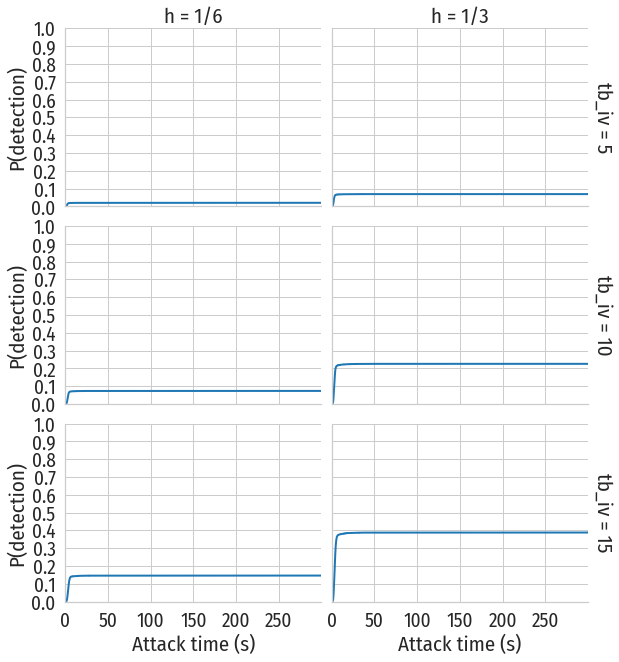

In [9]:
SIMULATION_DURATION = 299.9

sns.set()
sns.set(style="whitegrid", font_scale=1.75)
sns.set_style({"font.family": "Fira Sans Condensed"})

fig = sns.displot(
    df_h_one_two, x = "attack_duration", row = "tb_iv", col = "h",
    kind = "ecdf", height = 3.0, aspect = 1.4, legend = False,
    facet_kws = dict(margin_titles=True), lw = 2.0,
    row_order = (5, 10, 15), col_order = ("1/6", "1/3"),
    color = "tab:blue",
)

fig.set_axis_labels(x_var = "Attack time (s)", y_var = "P(detection)")
fig.set_titles("")

fig.set(xlim=(0.0, SIMULATION_DURATION), ylim=(0.0, 1.0),
        xticks=np.arange(0.0, SIMULATION_DURATION, 50.0),
        yticks=np.arange(0.0, 1.1, 0.1))

plt.tight_layout(pad = 0.0, w_pad = 0.25, h_pad = 0.0)

plt.show()